In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import generate_controldf as gm
from preproc_funcs import *
from generate_plots import *
from helpers import *
from preproc_funcs import *
from scipy import stats
import plotly.graph_objects as go
from statsmodels.stats.anova import AnovaRM
import pingouin as pg

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

msize = 10
axes_fontsize = 14
title_fontsize = 18
%load_ext autoreload
%autoreload 2

Creating a new dataframe.
We have 6 subjects so far: [1, 5, 12, 14, 23, 26]

Running subj = 1, day = 06
Running subj = 5, day = 06
Running subj = 12, day = 06
Running subj = 14, day = 06
Running subj = 23, day = 06
Running subj = 26, day = 06


In [2]:
# Loading the data as a dataframe
df_calib_orig = gm.master_df

# Add additonal error metrics
df_calib_orig = add_metrics(df_calib_orig)

# Preprocess and filter both datasets
df_calib = filter_data_controlTask(df_calib_orig)

sub_list = np.unique(df_calib['subjID'].values)

Trials removed = 119 = 4.96% 
Timing issues = 0 = 0.0% 
No saccades detected issues = 42 = 1.75% 
Reaction time issues = 4 = 0.17% 
Large errors = 73 = 3.04% 



In [ ]:
# Choose what you wanna see
print('Dataframe description')
df_calib.info()
df_calib.describe(include=object)

In [3]:
subs_to_remove = []
# subs_to_remove = [11, 16, 18]
df_calib_filt = elim_subs_blocks_control(df_calib, subs_to_remove)
sub_list_filt = [ss for ss in sub_list if ss not in subs_to_remove]

Removed subjects: []
Removed blocks df1:
   subjID  day  rnum
0      12    6     9


/var/folders/cf/d9j3_ppd5wb4bn9y_fgj3nb800010l/T/ipykernel_5148/3554303301.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['hemiIn', 'hemiOut'])
/var/folders/cf/d9j3_ppd5wb4bn9y_fgj3nb800010l/T/ipykernel_5148/3554303301.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['hemiIn', 'hemiOut'])
/var/folders/cf/d9j3_ppd5wb4bn9y_fgj3nb800010l/T/ipykernel_5148/3554303301.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['hemiIn', 'hemiOut'])
/var/folders/cf/d9j3_ppd5wb4bn9y_fgj3nb800010l/T/ipykernel_5148/3554303301.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xti

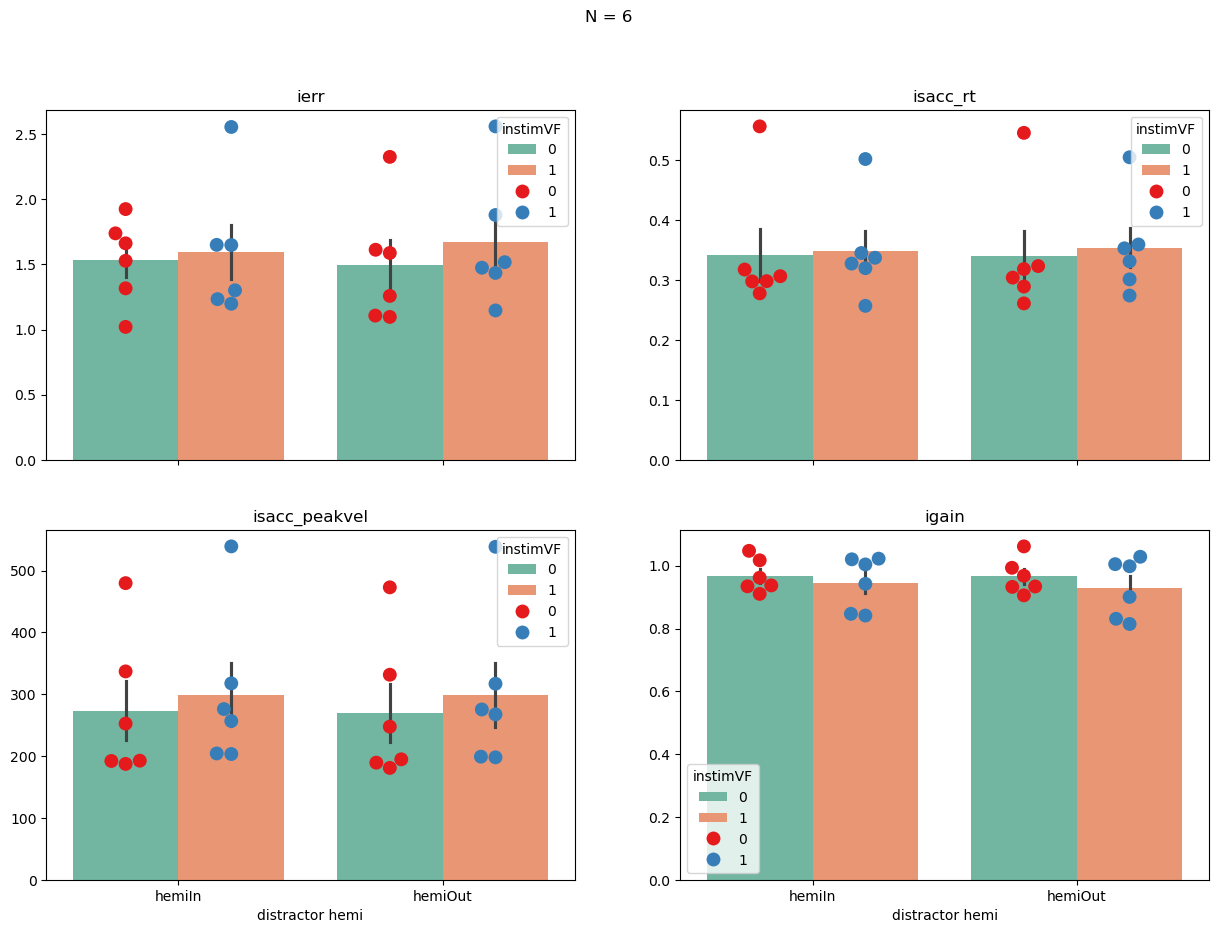

In [7]:
metricsToPlot = ['ierr', 'isacc_rt', 'isacc_peakvel', 'igain']

f, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axs = axs.ravel()
for i, metric in enumerate(metricsToPlot):
    dfThis = df_calib_filt.groupby(['subjID', 'distractorHemi', 'instimVF'])[metric].mean().reset_index()
    # sns.boxplot(x='distractorHemi', y=metric, hue='instimVF', data=dfThis, ax=axs[i], palette='Set2')
    sns.barplot(x='distractorHemi', y=metric, hue='instimVF', data=dfThis, ax=axs[i], palette='Set2', errorbar='se')
    sns.swarmplot(x='distractorHemi', y=metric, hue='instimVF', data=dfThis, ax=axs[i], dodge=True,
                    palette='Set1', size=msize)

    axs[i].set_title(metric)
    axs[i].set_xlabel('distractor hemi')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels(['hemiIn', 'hemiOut'])
# plt.tight_layout()
plt.suptitle(f'N = {len(sub_list_filt)}')
plt.show()

In [10]:
metricsToPlot = ['ierr', 'isacc_rt', 'isacc_peakvel', 'igain']

for xx in range(len(sub_list_filt)):
    dfThis = df_calib_filt[df_calib_filt['subjID'] == sub_list_filt[xx]]
    hemiStimulated = dfThis['hemistimulated'].unique()[0]
    if hemiStimulated == 'Left':
        

    


# f, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
# axs = axs.ravel()
# for i, metric in enumerate(metricsToPlot):
    
    

#     axs[i].set_title(metric)
#     axs[i].set_xlabel('distractor hemi')
#     axs[i].set_ylabel('')
#     axs[i].set_xticklabels(['hemiIn', 'hemiOut'])
# # plt.tight_layout()
# plt.suptitle(f'N = {len(sub_list_filt)}')
# plt.show()

['Left']
['Left']
['Left']
['Right']
['Right']
['Left']
